# Practical Data Science - Assignment 2

## Statlog (Heart) Analysis

 Data collected from UCI Machine Learning Library

### Attribute Information:

1. age       
2. sex (1 = male; 0 = female)      
3. chest pain type  (4 values) 
   Value 1: typical angina
   Value 2: atypical angina
   Value 3: non-anginal pain 
   Value 4: asymptomatic 
4. resting blood pressure  
5. serum cholesterol in mg/dl      
6. fasting blood sugar > 120 mg/dl (1 = true; 0 = false)      
7. resting electrocardiographic results  (values 0,1,2)
   Value 0: normal
   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   Value 2: showing probable or definite left ventricular hypertrophy 
8. maximum heart rate achieved  
9. exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest   
11. the slope of the peak exercise ST segment  
   Value 1: upsloping 
   Value 2: flat 
   Value 3: downsloping 
12. number of major vessels (0-3) colored by flourosopy        
13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Attributes types

Real: 1,4,5,8,10,12 Ordered:11, Binary: 2,6,9 Nominal:7,3,13

## Variable to be predicted

Absence (1) or presence (2) of heart disease

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn')

In [2]:
column_names = ['age','sex','cp_type','resting_bp','serum_cholesterol',
                'fasting_bs','resting_ec','maximum_heart_rate',
                'angina','oldpeak','slope','major_vessels','thal','heart_disease']

heart_raw = pd.read_csv('heart.dat', delimiter=' ', header=None, names=column_names, index_col=False)
heart = heart_raw.copy()

In [3]:
heart.head()

,age,sex,cp_type,resting_bp,serum_cholesterol,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


### Give Meaningful text to nominal and binary variable

In [4]:
age_conversion = {0:"Female",1:"Male"}
heart.sex = heart.sex.apply(lambda x:age_conversion[x])

chest_pain = {
    1: "Typical Angina Value",
    2: "Atypical Angina Value",
    3: "Non-Anginal Pain Value",
    4: "Asymptomatic"
}
heart.cp_type = heart.cp_type.astype(int).apply(lambda x:chest_pain[x])

fasting_bp_conversion = {1:"Greater than 120", 0:"Less than 120"}
heart.fasting_bs = heart.fasting_bs.apply(lambda x:fasting_bp_conversion[x])

resting_ec_conversion = {
    0: "Normal",
    1: "ST-T wave abnormality",
    2: "Probable left ventricular hypertrophy"
}
heart.resting_ec = heart.resting_ec.astype(int).apply(lambda x:resting_ec_conversion[x])

angina_conversion = {0:"No",1:"Yes"}
heart.angina = heart.angina.apply(lambda x:angina_conversion[x])

slope_conversion = {
    1: "Upsloping Value",
    2: "Flat Value",
    3: "Downsloping"
}
heart.slope = heart.slope.astype(int).apply(lambda x:slope_conversion[x])

thal_conversion = {
    3: "Normal",
    6: "Fixed Defect",
    7: "Reversable defect"
}
heart.thal = heart.thal.astype(int).apply(lambda x:thal_conversion[x])

heart_disease_conversion = {1:"No",2:"Yes"}
heart.heart_disease = heart.heart_disease.apply(lambda x:heart_disease_conversion[x])

heart.head()

,age,sex,cp_type,resting_bp,serum_cholesterol,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70.0,Male,Asymptomatic,130.0,322.0,Less than 120,Probable left ventricular hypertrophy,109.0,No,2.4,Flat Value,3.0,Normal,Yes
1,67.0,Female,Non-Anginal Pain Value,115.0,564.0,Less than 120,Probable left ventricular hypertrophy,160.0,No,1.6,Flat Value,0.0,Reversable defect,No
2,57.0,Male,Atypical Angina Value,124.0,261.0,Less than 120,Normal,141.0,No,0.3,Upsloping Value,0.0,Reversable defect,Yes
3,64.0,Male,Asymptomatic,128.0,263.0,Less than 120,Normal,105.0,Yes,0.2,Flat Value,1.0,Reversable defect,No
4,74.0,Female,Atypical Angina Value,120.0,269.0,Less than 120,Probable left ventricular hypertrophy,121.0,Yes,0.2,Upsloping Value,1.0,Normal,No


In [5]:
heart.dtypes

age                   float64
sex                    object
cp_type                object
resting_bp            float64
serum_cholesterol     float64
fasting_bs             object
resting_ec             object
maximum_heart_rate    float64
angina                 object
oldpeak               float64
slope                  object
major_vessels         float64
thal                   object
heart_disease          object
dtype: object

In [6]:
#checking the NaN values in the data set
heart.isnull().any()

age                   False
sex                   False
cp_type               False
resting_bp            False
serum_cholesterol     False
fasting_bs            False
resting_ec            False
maximum_heart_rate    False
angina                False
oldpeak               False
slope                 False
major_vessels         False
thal                  False
heart_disease         False
dtype: bool

## Task 2 - Data Exploration

### 1.Age

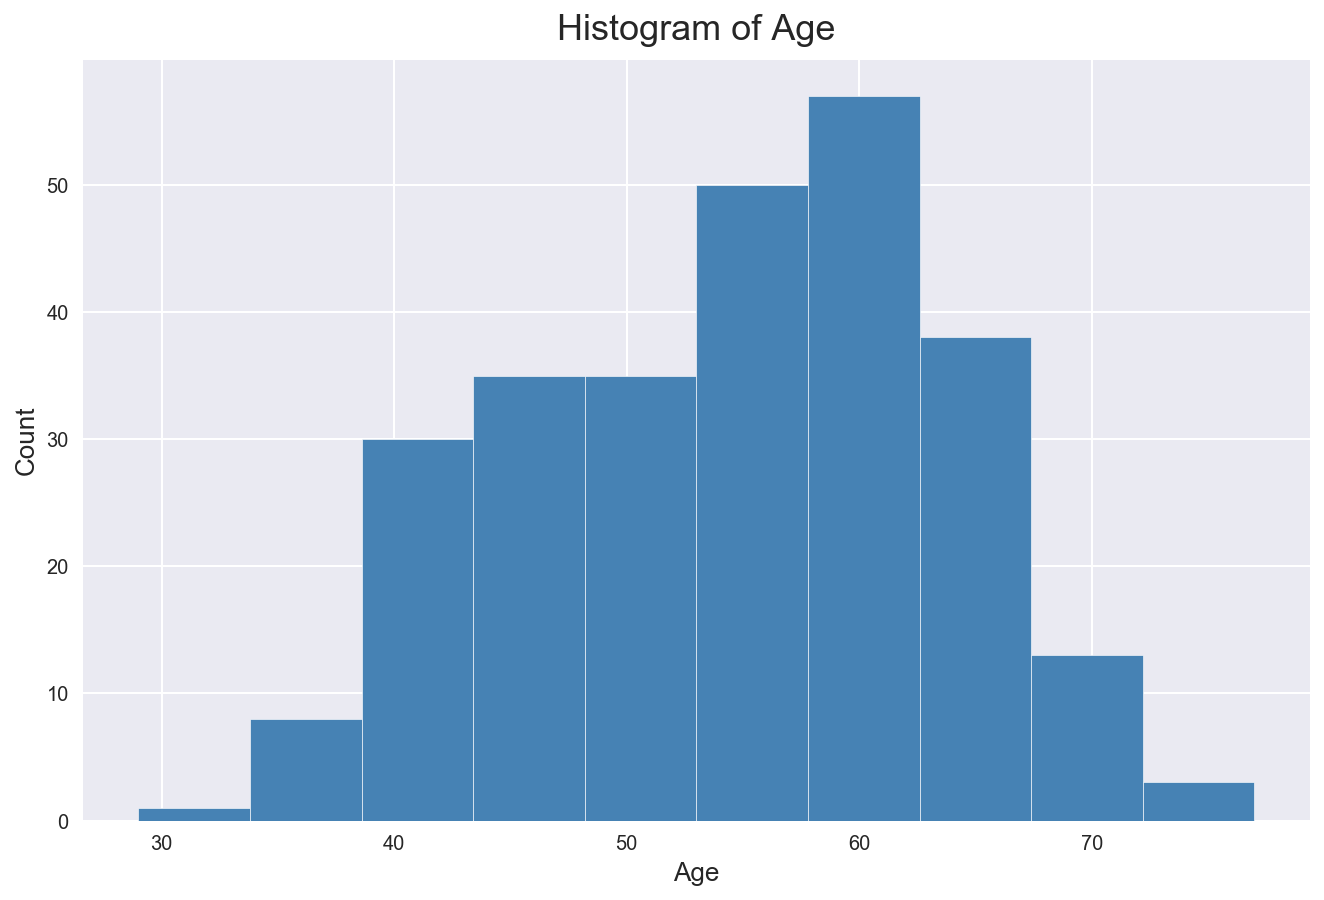

In [7]:
def make_histogram(df, column, title):
    plt.rcParams["figure.figsize"] = (11,7)
    df[column].plot(kind='hist', edgecolor='white', color='steelblue')

    plt.title(f'Histogram of {title}', fontsize=18, y=1.01)
    plt.xlabel(title.title(), fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.show()

make_histogram(heart, 'age', 'Age')

### 2.Sex

In [8]:
heart.sex.unique().tolist()

['Male', 'Female']

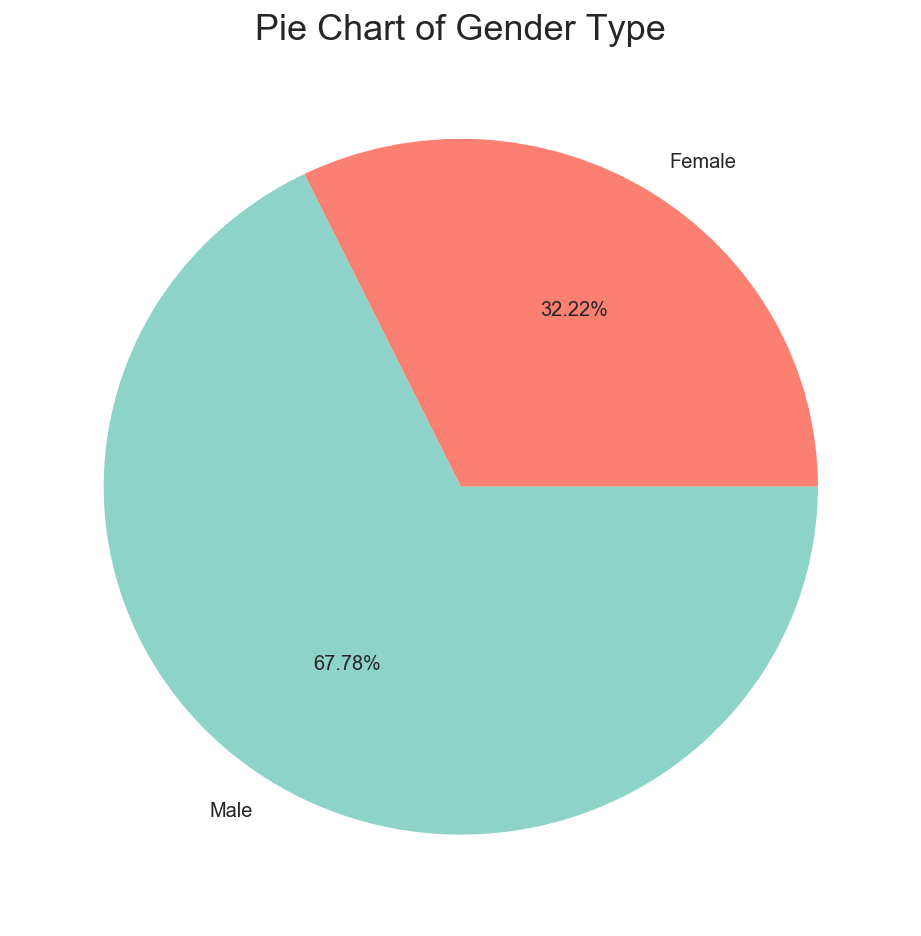

In [9]:
def make_pie_chart(data, column, title):
    plt.rcParams["figure.figsize"] = (8,8)
    color_brewer = ["#FB8072", "#8DD3C7","#BEBADA","#80B1D3","#FB8072","#FFFFB3",
                         "#FDB462","#B3DE69","#FCCDE5", ]

    pd.value_counts(data[column].values, sort=True, ascending=True). \
    plot(kind='pie',autopct='%1.2f%%', colors=color_brewer)
    plt.title(f'Pie Chart of {title}', fontsize=18)
    plt.xlabel('')
    plt.ylabel('')

make_pie_chart(heart, 'sex', 'Gender Type')

### 3.Chest Pain Type

In [10]:
heart.cp_type.unique().tolist()

['Asymptomatic',
 'Non-Anginal Pain Value',
 'Atypical Angina Value',
 'Typical Angina Value']

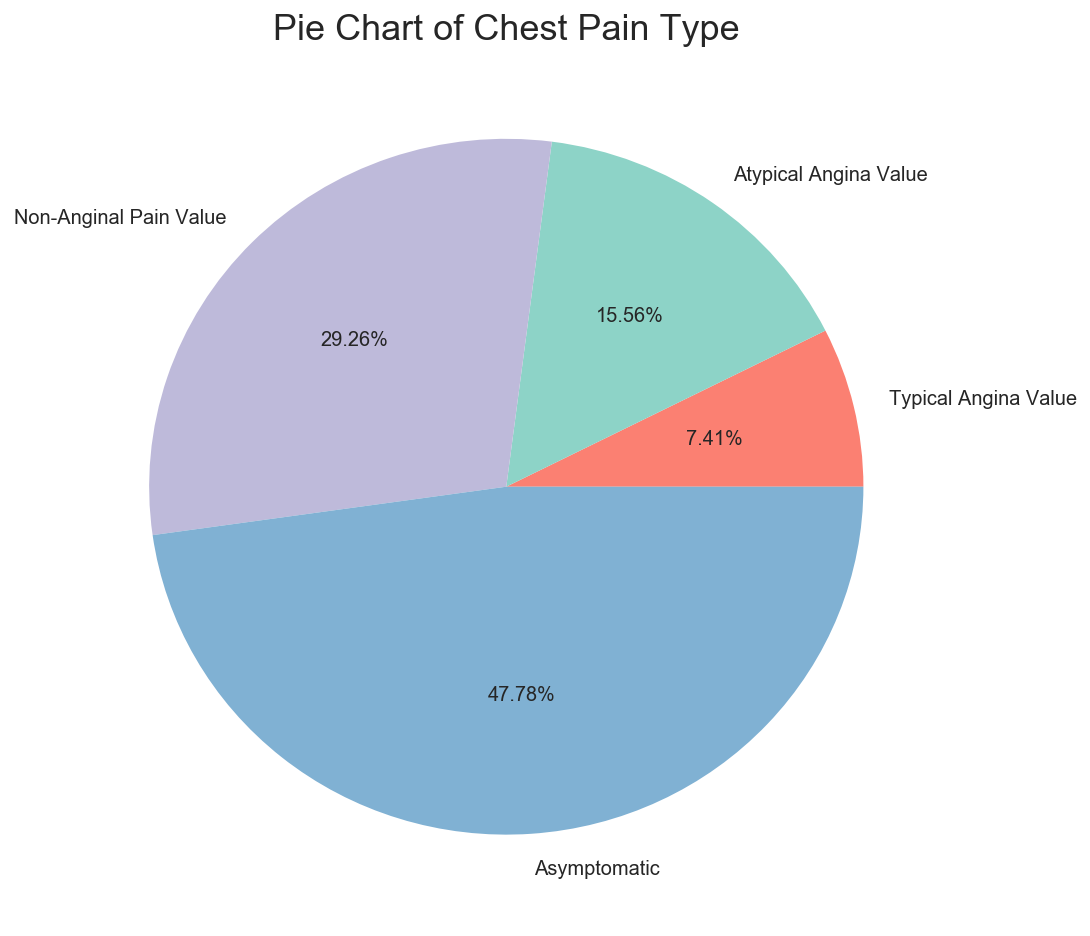

In [11]:
make_pie_chart(heart, 'cp_type', 'Chest Pain Type')

### 4.Resting Blood Pressure

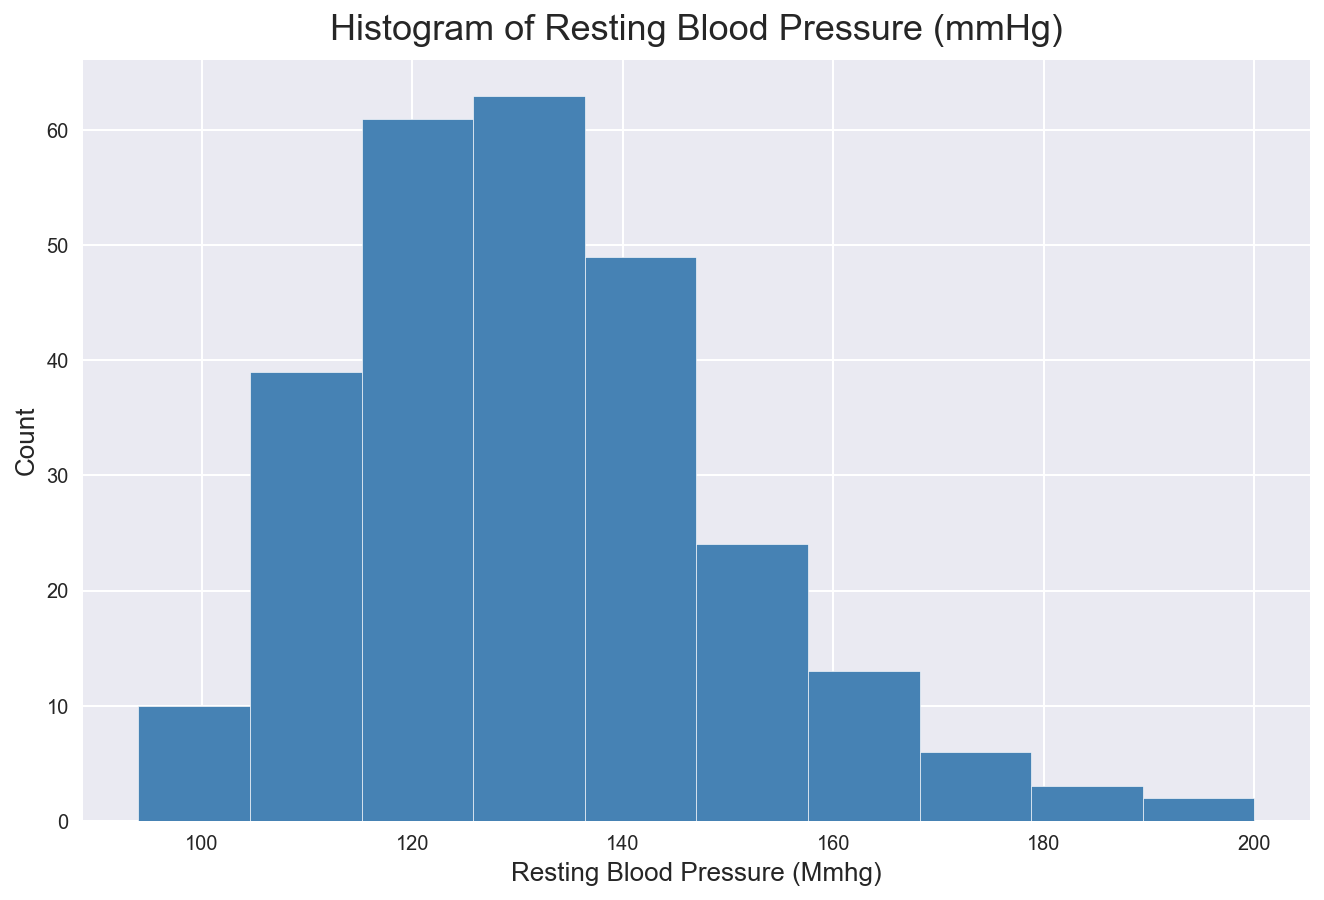

In [12]:
make_histogram(heart, 'resting_bp', 'Resting Blood Pressure (mmHg)')

### 5.Serum Cholestoral 

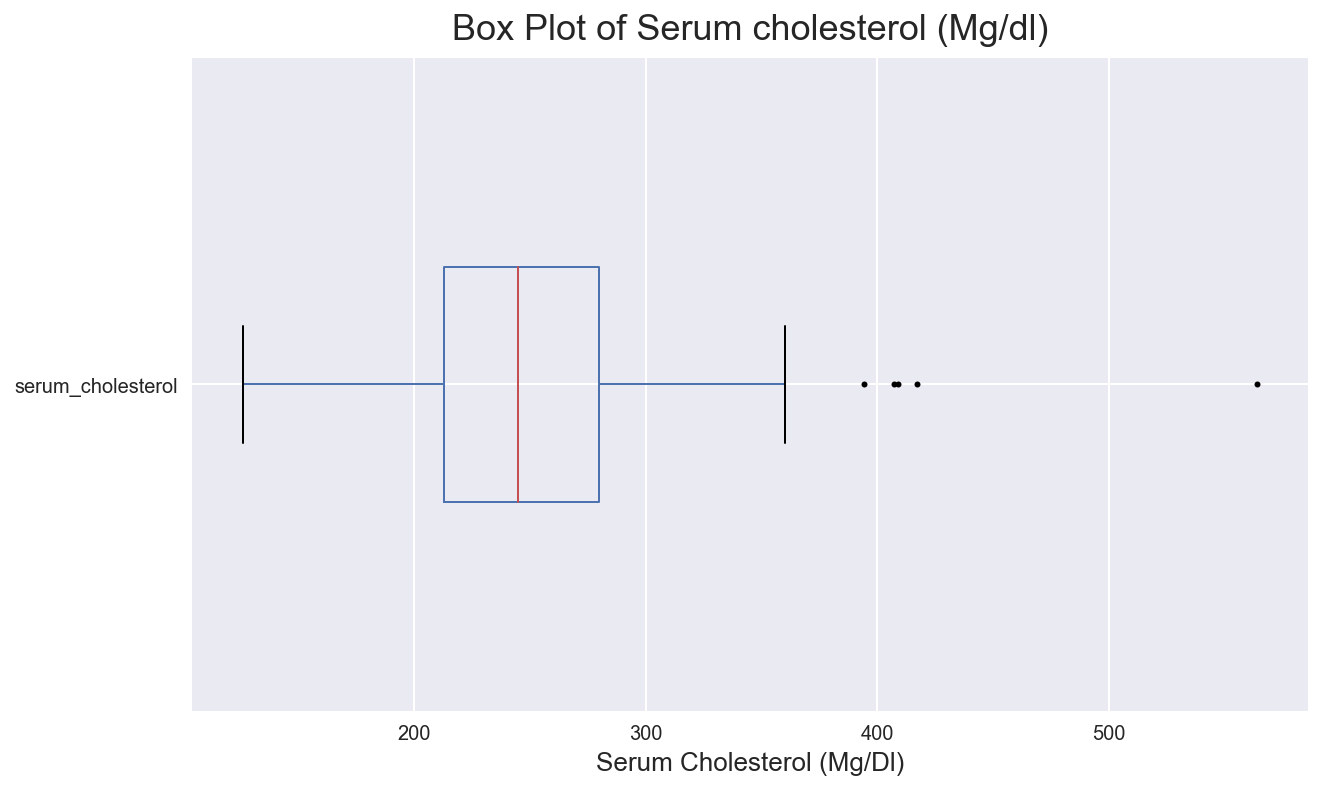

In [13]:
def make_boxplot(df, column, title):
    plt.rcParams["figure.figsize"] = (10,6)
    df[column].plot(kind='box', showfliers=True, sym='k.',vert=False, widths=.36)
    plt.title(f'Box Plot of {title}', fontsize=18, y=1.01)
    plt.xlabel(title.title(), fontsize=13)
    plt.ylabel('')
    plt.show()
make_boxplot(heart, 'serum_cholesterol', 'Serum cholesterol (Mg/dl)')

### 6.Fasting Blood Sugar

In [14]:
heart.fasting_bs.unique()

array(['Less than 120', 'Greater than 120'], dtype=object)

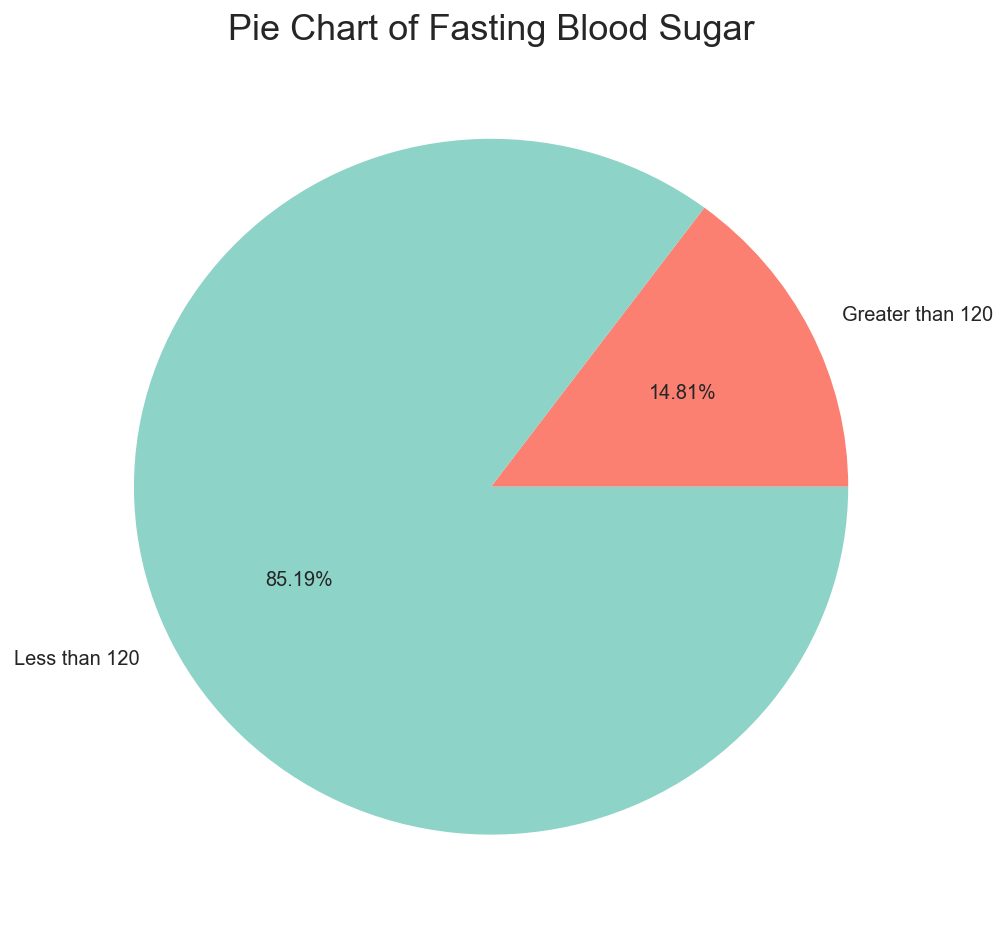

In [15]:
make_pie_chart(heart, 'fasting_bs', 'Fasting Blood Sugar')

### 7.Resting Electrocardiographic Results

In [16]:
heart.resting_ec.unique()

array(['Probable left ventricular hypertrophy', 'Normal',
       'ST-T wave abnormality'], dtype=object)

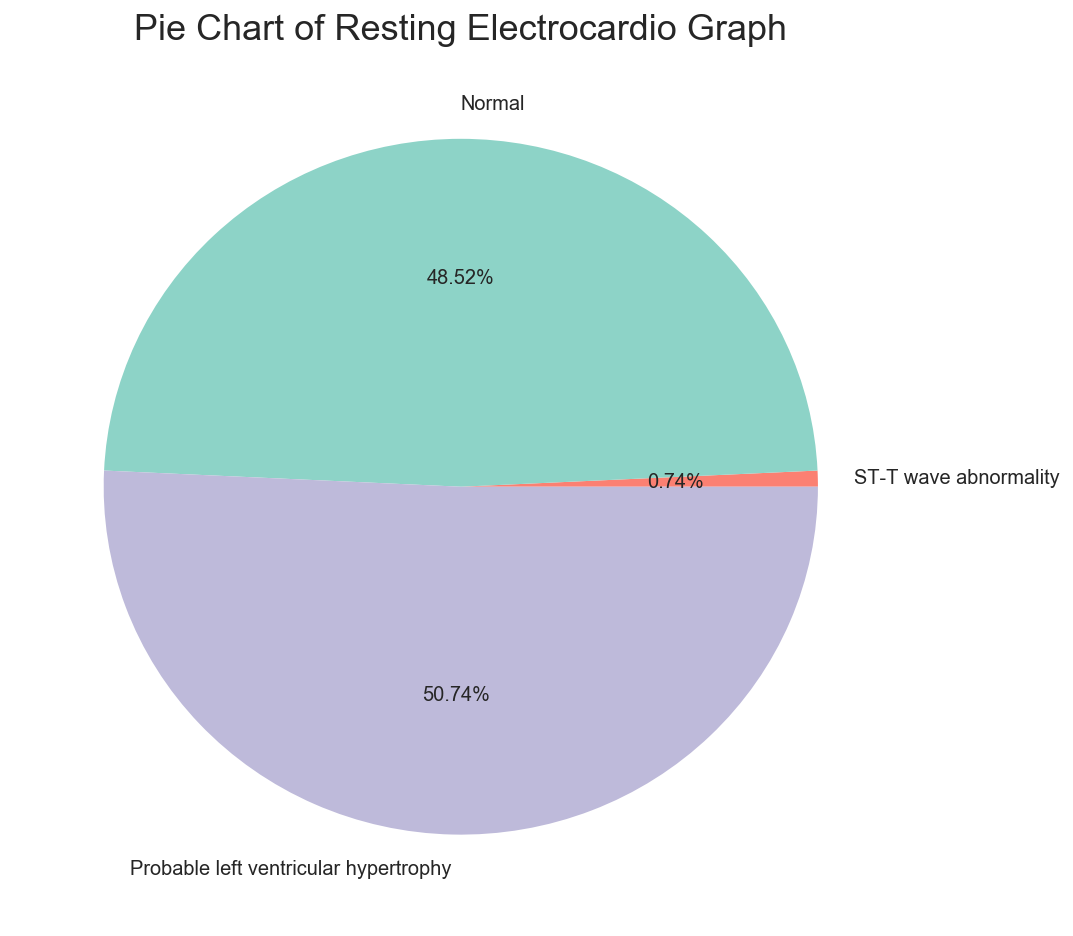

In [17]:
make_pie_chart(heart, 'resting_ec', 'Resting Electrocardio Graph')

### 8.Maximum Heart-Rate Achieved

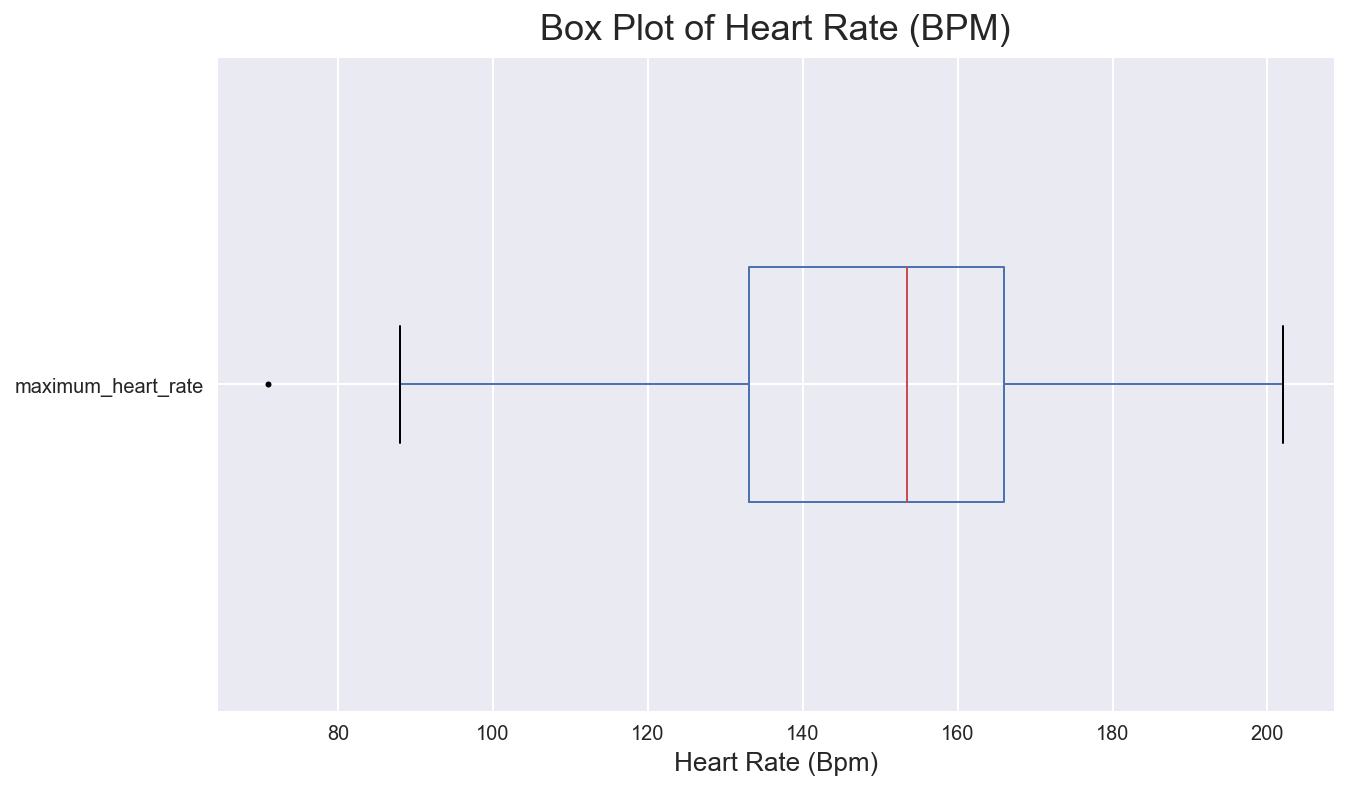

In [18]:
make_boxplot(heart, 'maximum_heart_rate', 'Heart Rate (BPM)')

### 9.Exercise Induced Angina

In [19]:
heart.angina.unique()

array(['No', 'Yes'], dtype=object)

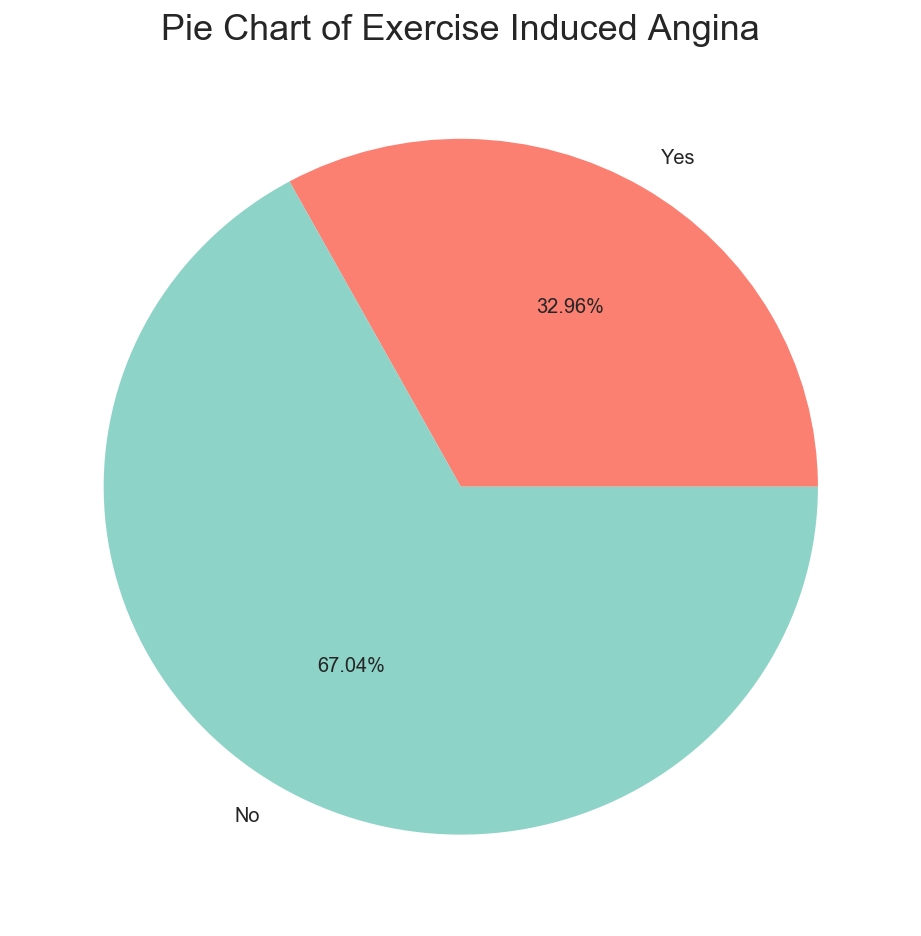

In [20]:
make_pie_chart(heart, 'angina', 'Exercise Induced Angina')

### 10.Oldpeak

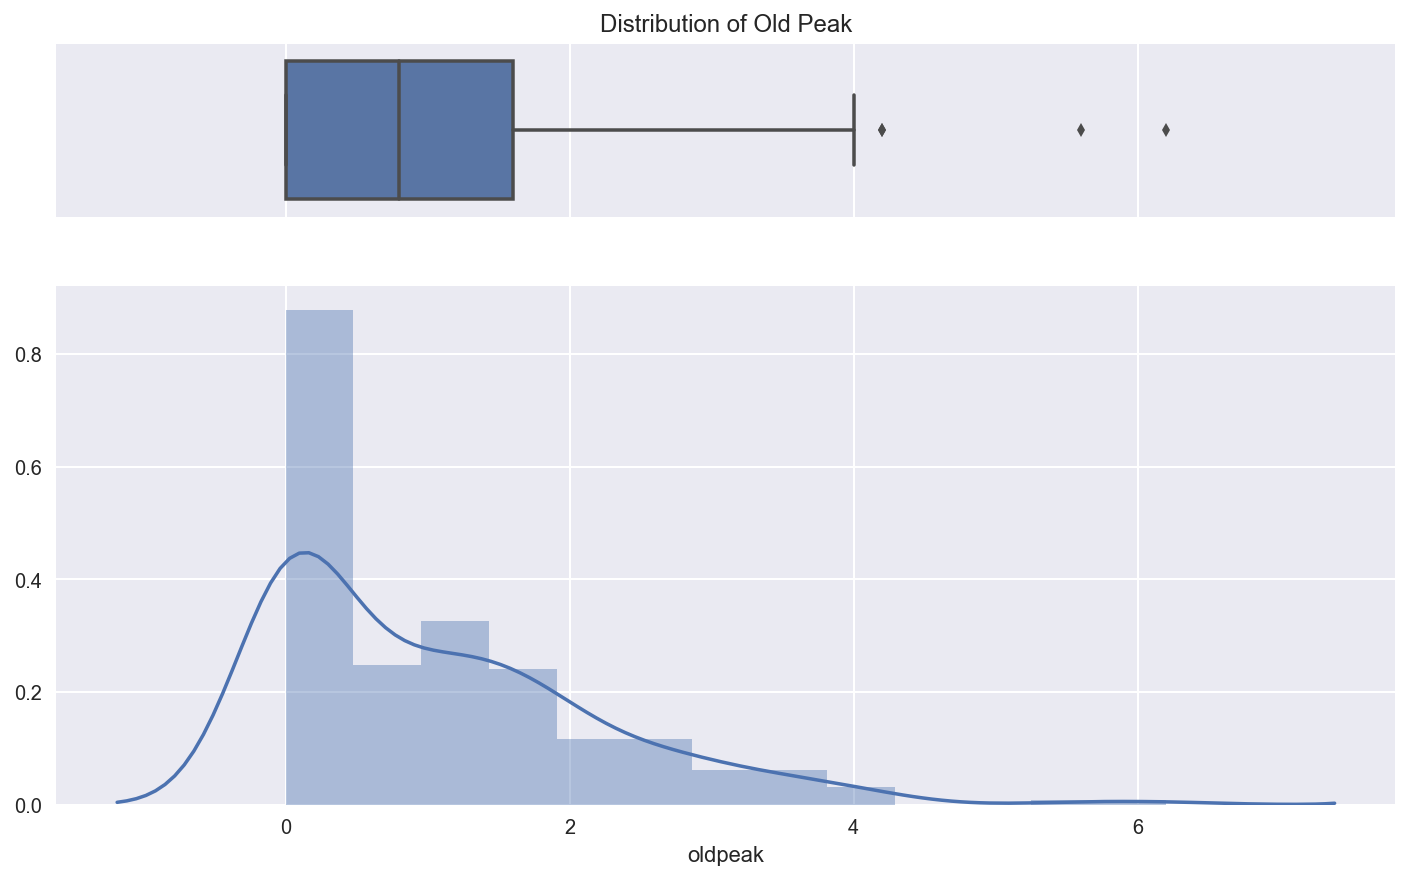

In [21]:
plt.rcParams["figure.figsize"] = (12,7)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
sns.boxplot(heart["oldpeak"], ax=ax_box)
sns.distplot(heart["oldpeak"], ax=ax_hist)
ax_box.set(title='Distribution of Old Peak')
ax_box.set(xlabel='')
plt.show()

### 11. Slope of the peak exercise ST segment

In [22]:
heart.slope.unique()

array(['Flat Value', 'Upsloping Value', 'Downsloping'], dtype=object)

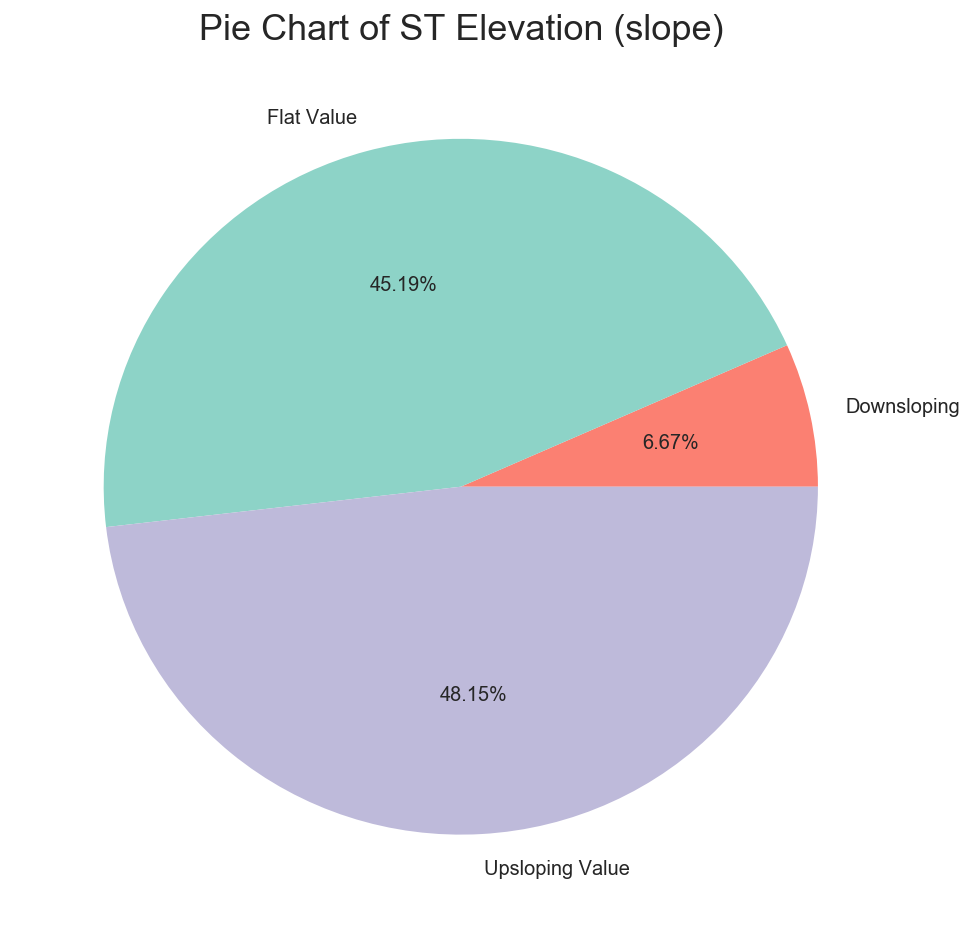

In [23]:
make_pie_chart(heart, 'slope', 'ST Elevation (slope)')

### 12. No.of Major vessels (0-3) colored by flourosopy

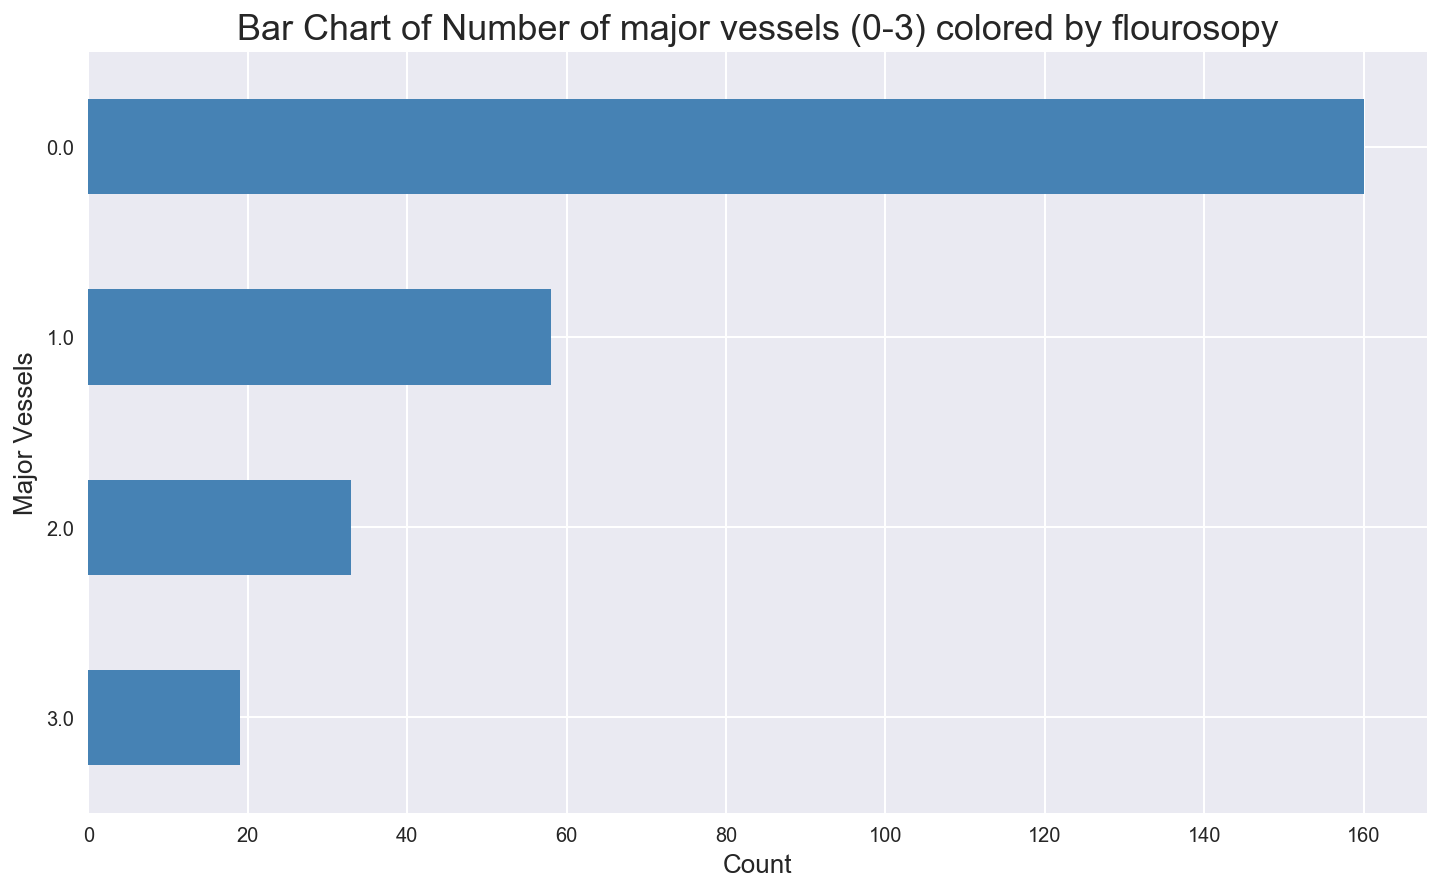

In [24]:
plt.rcParams["figure.figsize"] = (12,7)
pd.value_counts(heart['major_vessels'].values, 
                sort=True, ascending=True).plot(kind='barh', color='steelblue')
plt.title('Bar Chart of Number of major vessels (0-3) colored by flourosopy', fontsize=18)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Major Vessels', fontsize=13)
plt.show()

### 13.Thal

In [25]:
heart.thal.unique()

array(['Normal', 'Reversable defect', 'Fixed Defect'], dtype=object)

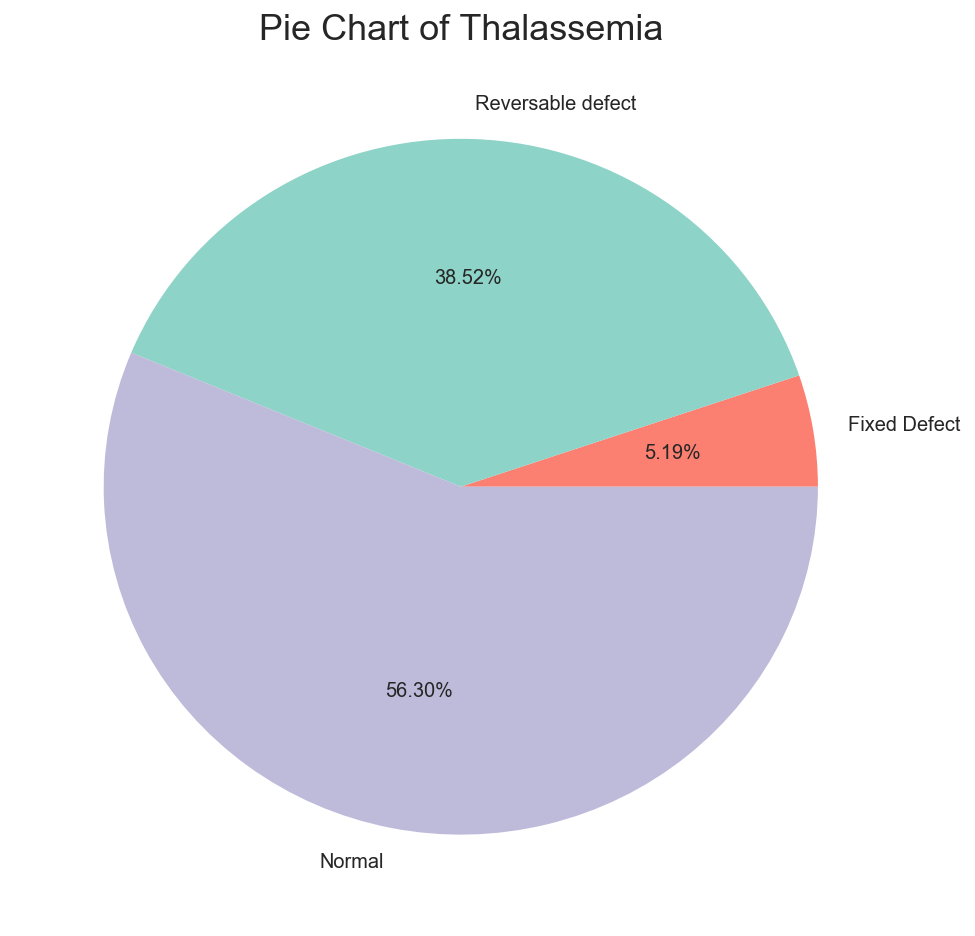

In [26]:
make_pie_chart(heart, 'thal', 'Thalassemia')

### Heart Disease

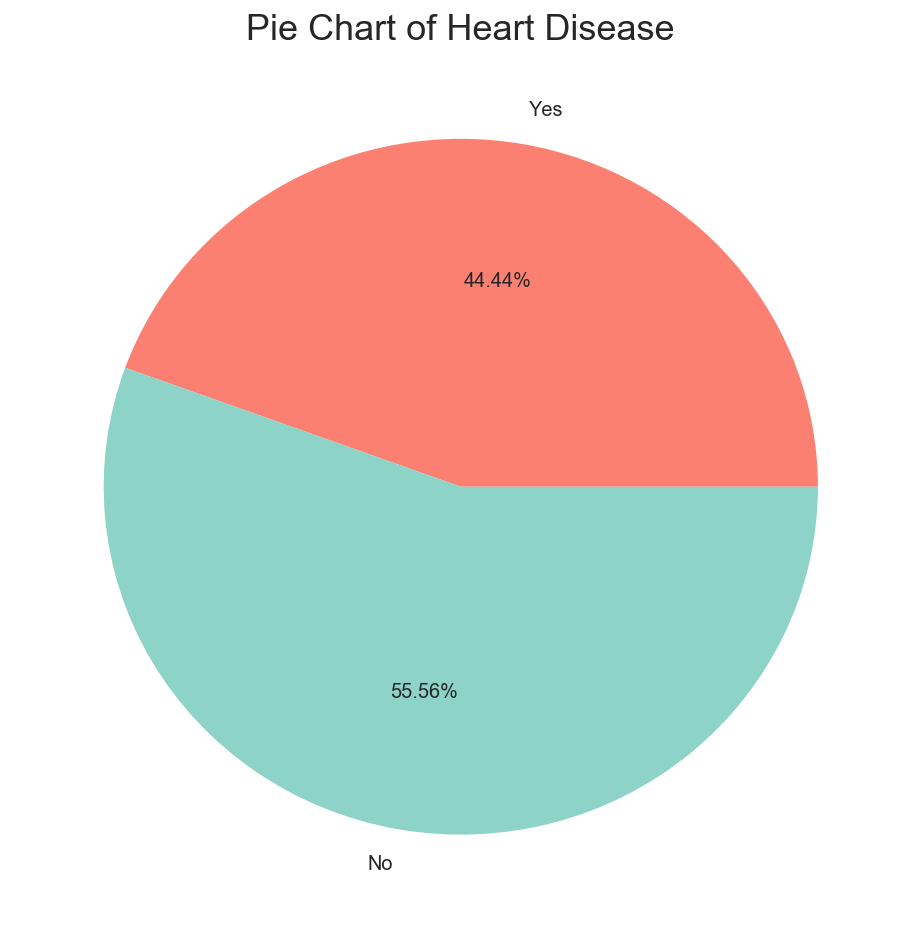

In [27]:
make_pie_chart(heart, 'heart_disease', 'Heart Disease')

## Comparision

In [28]:
heart.head()

,age,sex,cp_type,resting_bp,serum_cholesterol,fasting_bs,resting_ec,maximum_heart_rate,angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70.0,Male,Asymptomatic,130.0,322.0,Less than 120,Probable left ventricular hypertrophy,109.0,No,2.4,Flat Value,3.0,Normal,Yes
1,67.0,Female,Non-Anginal Pain Value,115.0,564.0,Less than 120,Probable left ventricular hypertrophy,160.0,No,1.6,Flat Value,0.0,Reversable defect,No
2,57.0,Male,Atypical Angina Value,124.0,261.0,Less than 120,Normal,141.0,No,0.3,Upsloping Value,0.0,Reversable defect,Yes
3,64.0,Male,Asymptomatic,128.0,263.0,Less than 120,Normal,105.0,Yes,0.2,Flat Value,1.0,Reversable defect,No
4,74.0,Female,Atypical Angina Value,120.0,269.0,Less than 120,Probable left ventricular hypertrophy,121.0,Yes,0.2,Upsloping Value,1.0,Normal,No


### Relationship between Age and Blood Pressure

In [29]:
plot = sns.jointplot(x=heart["age"], y=heart["serum_cholestoral"], kind='scatter', size=8)
plot.ax_joint.set_xlabel('Age', fontweight='bold')
plot.ax_joint.set_ylabel('Serum cholesterol', fontweight='bold')

KeyError: 'serum_cholestoral'

In [ ]:
plot = sns.jointplot(x=heart["age"], y=heart["serum_cholestoral"], kind='scatter', size=8)
plot.ax_joint.set_xlabel('Age', fontweight='bold')
plot.ax_joint.set_ylabel('Serum cholesterol', fontweight='bold')

In [ ]:
heart.head()
plt.rcParams["figure.figsize"] = (10,10)
sns.boxplot(x='resting_ec', y='maximum_heart_rate', hue='heart_disease', 
            data=heart, palette=["#8DD3C7", "#FB8072"])
plt.title('Relationship Between Resting electrocardiograph & Heart Rate by Sex', fontsize=18, y=1.02)
plt.xlabel('Electro Cardio Graph Types', fontsize=13)
plt.ylabel('Maximum Heart Rate', fontsize=13)
plt.show()

In [ ]:
pd.crosstab(index=heart["cp_type"], columns=heart['sex']).plot(kind='barh')
plt.title(f'Relationship between Sex and Chest Pain Type')
plt.xlabel('Chest pain type ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["cp_type"], columns=heart['slope']).plot(kind='bar')
plt.title(f'Relationship between Slope of the peak exercise ST segment and Chest Pain Type')
plt.xlabel('Chest pain type ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["fasting_bs"], columns=heart['thal']).plot(kind='bar')
plt.title(f'Relationship between Fasting blood sugar and Thal')
plt.xlabel('fasting blood sugar ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["angina"], columns=heart['major_vessels']).plot(kind='bar')
plt.title(f'Relationship between Angina and no.of Major vessels (0-3) colored by flourosopy')
plt.xlabel('angina ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["cp_type"], columns=heart['major_vessels']).plot(kind='bar')
plt.title(f'Relationship between Chest Pain Type and no.of Major vessels (0-3) colored by flourosopy')
plt.xlabel('Chest Pain Type ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["sex"], columns=heart['heart_disease']).plot(kind='bar')
plt.title(f'Relationship between sex and people suffering from heart disease')
plt.xlabel('sex ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["heart_disease"], columns=heart['cp_type']).plot(kind='bar')
plt.title(f'Relationship between Chest Pain Type and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["heart_disease"], columns=heart['major_vessels']).plot(kind='bar')
plt.title(f'Relationship between no.of Major vessels and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["angina"], columns=heart['heart_disease']).plot(kind='bar')
plt.title(f'Relationship between angina and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["fasting_bs"], columns=heart['heart_disease']).plot(kind='bar')
plt.title(f'Relationship between Fasting and people suffering from heart disease')
plt.xlabel('fasting_bs ')
plt.ylabel('count')
plt.show()

In [ ]:
pd.crosstab(index=heart["heart_disease"], columns=heart['slope']).plot(kind='bar')
plt.title(f'Relationship between Slope of the peak exercise ST segment and people suffering from heart disease')
plt.xlabel('heart disease ')
plt.ylabel('count')
plt.show()

## CLASSIFICATION

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(heart,heart['heart_disease'],test_size=0.50,random_state=4)


In [ ]:
X_train.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(5)


In [ ]:
fit=clf.fit(X_train, y_train)




In [ ]:
y_pre=fit.predict(X_test)

In [ ]:
y_pre

In [ ]:
predicted = clf.predict(X_test)
predicted

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print(cm) 


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print( classification_report(y_test,y_pre))

In [ ]:
predicted

In [ ]:
print("[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4)


In [ ]:
for k, (train_index, test_index) in enumerate(kf.split(heart)):
    X_train, X_test = heart[train_index], heart[test_index]
    y_train, y_test = heart_disease[train_index], heart_disease[test_index]

    clf.fit(X_train, y_train)
#     print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
